# Zomato Project

In [35]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
restaurants=pd.read_csv("E:\practice files\zomato.csv",encoding = "ISO-8859-1")
countrycode=pd.read_excel("E:\practice files\Country-Code.xlsx", engine='openpyxl')


In [37]:
restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [38]:
restaurants.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [39]:
countrycode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


## Data Cleaning

The average cost for two column has some 0 values which is improper. Lets try removing those datas


In [40]:
restaurants['Average Cost for two']=restaurants['Average Cost for two'].replace(0,np.nan)

In [41]:
restaurants.dropna(inplace=True)

## 1) Merging the country sheet and zomato file to get the country code

In [42]:
restaurants=restaurants.merge(countrycode,on='Country Code')

In [43]:
restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


###  Listing all the country now to do analysis on them seperately

In [44]:
indiaRes=restaurants[restaurants['Country']=='India']
singaporeRes=restaurants[restaurants['Country']=='Singapore']
AusRes=restaurants[restaurants['Country']=='Australia']
BrazRes=restaurants[restaurants['Country']=='Brazil']
CanadaRes=restaurants[restaurants['Country']=='Canada']
UAERes=restaurants[restaurants['Country']=='UAE']
UKRes=restaurants[restaurants['Country']=='United Kingdom']
USRes=restaurants[restaurants['Country']=='United States']

## 2) Get the Top rated restaurants in each city in India

In [45]:
indiaRes.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
609,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
610,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
611,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
612,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
613,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


#### - Get the cities in india
####  - Get the top restaurants in each city(On the basis of rating and votes)



In [46]:
indiaRes.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Ahmedabad         21
Amritsar          21
Vizag             20
Indore            20
Aurangabad        20
Jaipur            20
Patna             20
Surat             20
Ludhiana          20
Mumbai            20
Bangalore         20
Vadodara          20
Mysore            20
Mangalore         20
Puducherry        20
Kochi             20
Pune              20
Nagpur            20
Bhopal            20
Chennai           20
Goa               20
Ranchi            20
Coimbatore        20
Nashik            20
Kolkata           20
Dehradun          19
Allahabad         19
Kanpur            18
Chandigarh        18
Varanasi          18
Hyderabad         18
Agra              17
Secunderabad       2
Panchkula          1
Mohali             1
Name: City, dtype: int64

### Top restaurant in delhi based on the rating and vote count

In [47]:
DelhiTopRes=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

## 3) Finding out relationship between the rating and votes

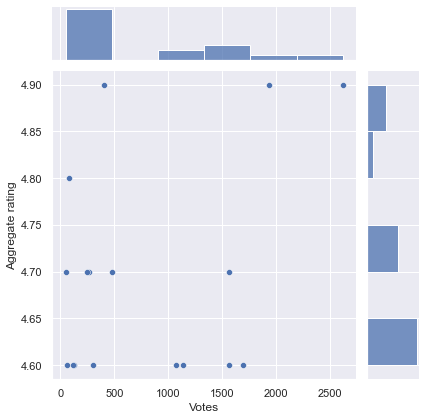

In [48]:
sns.jointplot('Votes','Aggregate rating',data=DelhiTopRes)

## 4)No of Restaurants in each country

In [49]:
India=indiaRes['Restaurant Name'].nunique()
India



6595

## 5) Top 5 restaurants with online delivery

In [50]:
DelhiTopResOnline=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5) &(indiaRes['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Online delivery']].sort_values(ascending=False,by='Votes')
DelhiTopResOnline

,Aggregate rating,Restaurant Name,Votes,Has Online delivery
2991,4.9,Naturals Ice Cream,2620,Yes
3288,4.6,Spezia Bistro,1071,Yes
6635,4.7,Naturals Ice Cream,474,Yes
2992,4.7,Zabardast Indian Kitchen,242,Yes
7158,4.6,Greenr Cafe,112,Yes
6404,4.6,Food Scouts,61,Yes


## 6)	Cheap but best restaurants available in a city

**checking which country is providing most online delivery option** 

<AxesSubplot:xlabel='Country', ylabel='count'>

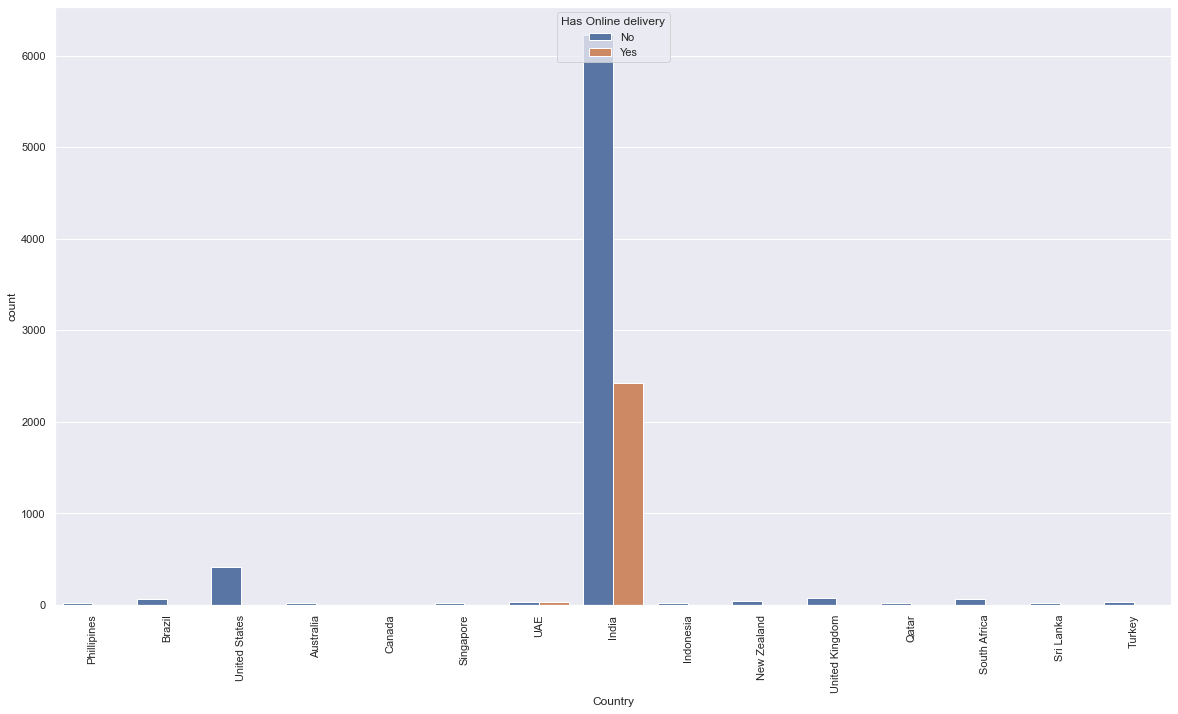

In [51]:
sns.set(rc={'figure.figsize':(20,11)})
plt.xticks(rotation = 90)
sns.countplot(restaurants['Country'],hue=restaurants['Has Online delivery'])

**Hunting for the cheap but best restaurants available in a city**

In [52]:
Chennai=indiaRes[(indiaRes['City']=='Chennai')&(indiaRes['Aggregate rating']>4.5)&(indiaRes['Votes']>500)][['Average Cost for two','Restaurant Name','Aggregate rating','Votes']].sort_values(ascending=True,by=['Average Cost for two']).head()

In [53]:
Chennai.style.apply(lambda x: ['background: darkorange' if x.name == 'Average Cost for two' else 'background: lightsteelblue' for i in x])

,Average Cost for two,Restaurant Name,Aggregate rating,Votes
792,350.000000,Fusilli Reasons,4.600000,1510
795,1200.000000,Bombay Brasserie,4.600000,1753
804,1400.000000,Coal Barbecues,4.600000,1267
803,1600.000000,AB's - Absolute Barbecues,4.900000,859
790,1700.000000,Chili's,4.800000,1262


## 7)Top cuisines in each region.

In [54]:
IndianCuisines=restaurants[restaurants['Country']=='India']['Cuisines'].value_counts().head()

In [55]:
table=pd.pivot_table(data=restaurants, index = ('Country', 'City'), values="Aggregate rating")

In [56]:
cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm,axis=0)

In [57]:
RestaurantratingEachCountry=pd.pivot_table(data=restaurants, index = ('Country', 'Rating text'), values=("Restaurant ID"),aggfunc="count")

In [58]:
RestaurantGroup=restaurants.groupby(by="Country")['Restaurant ID'].count()
RestaurantGroup.columns=['No of restaurants']

In [59]:
TotalRatingCountry=RestaurantGroup.groupby(by='Country').sum()

In [60]:
TotalRatingCountry.reset_index()

,Country,Restaurant ID
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,8643
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [61]:
FinalRestPerc=pd.merge(TotalRatingCountry.reset_index(),RestaurantratingEachCountry.reset_index(),on='Country')

In [62]:
FinalRestPerc
FinalRestPerc['Percentage']=(FinalRestPerc['Restaurant ID_y']/FinalRestPerc['Restaurant ID_x'])*100

In [63]:
FinalRestPerc

,Country,Restaurant ID_x,Rating text,Restaurant ID_y,Percentage
0,Australia,24,Average,4,16.666667
1,Australia,24,Excellent,1,4.166667
2,Australia,24,Good,13,54.166667
3,Australia,24,Poor,1,4.166667
4,Australia,24,Very Good,5,20.833333
...,...,...,...,...,...
61,United States,419,Excellent,67,15.990453
62,United States,419,Good,152,36.276850
63,United States,419,Not rated,3,0.715990
64,United States,419,Poor,2,0.477327


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

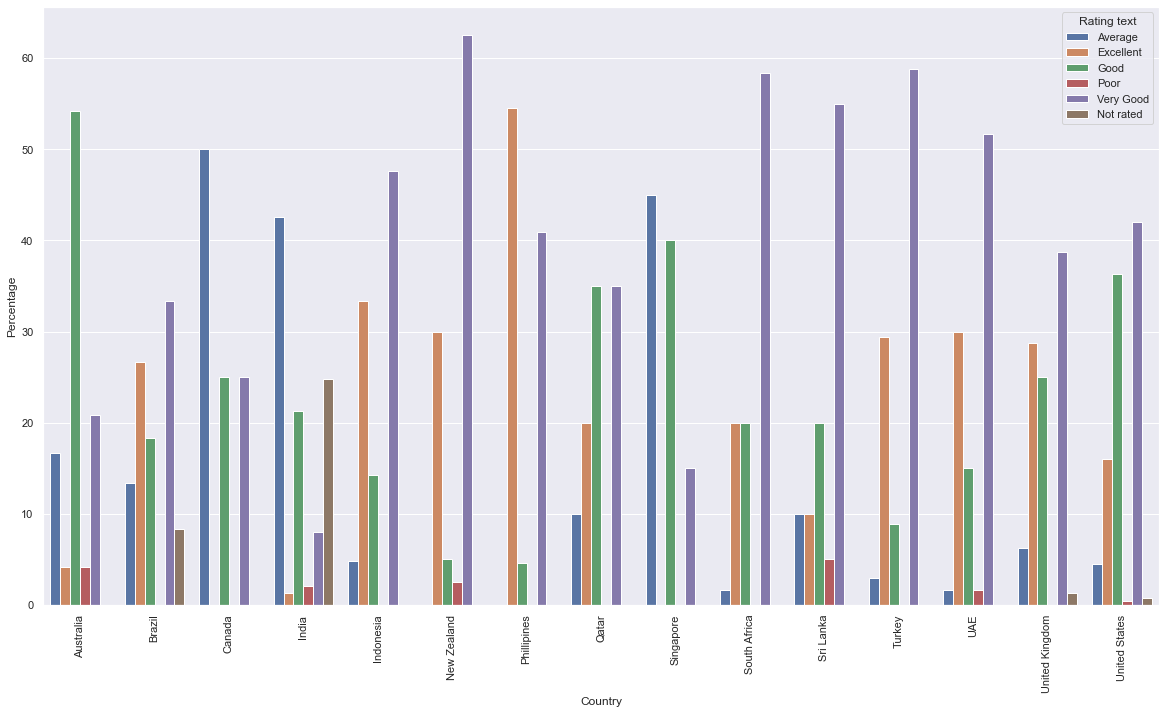

In [64]:
sns.set(rc={'figure.figsize':(20,11)})
sns.barplot('Country', 'Percentage', data=FinalRestPerc, hue = 'Rating text')
plt.xticks(rotation = 90)

<AxesSubplot:ylabel='Average Cost for two'>

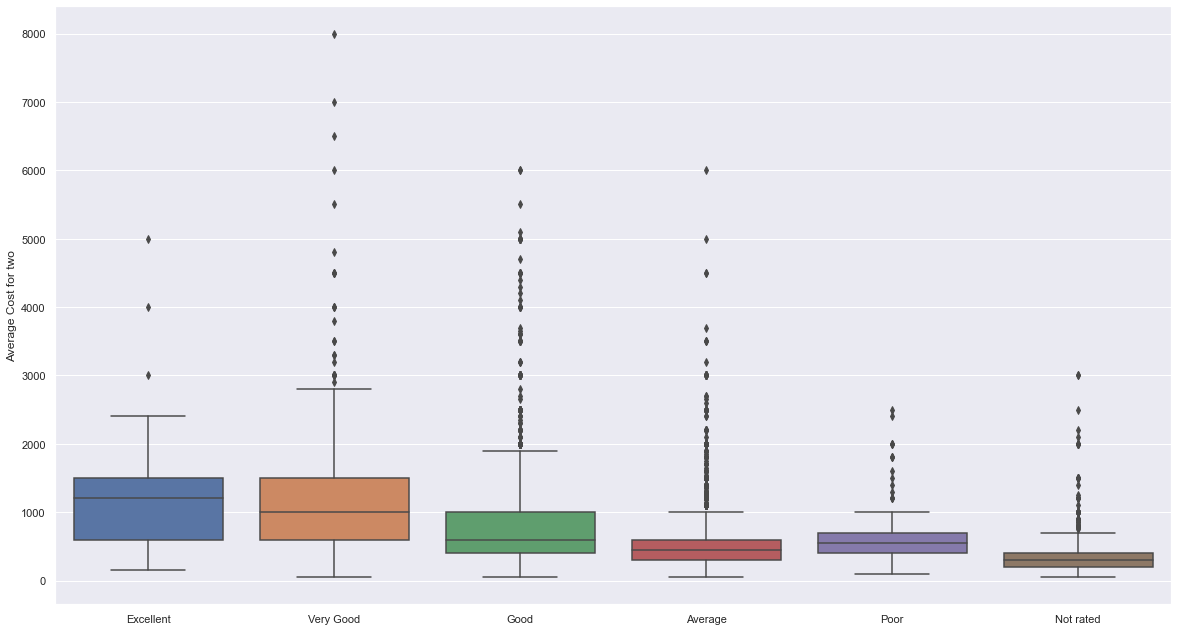

In [65]:
avgcostforindres=indiaRes['Average Cost for two']
aggratingofindres=pd.Categorical(values=indiaRes['Rating text'],categories=["Excellent", "Very Good", "Good", "Average", "Poor", "Not rated"], ordered=True)
sns.boxplot(aggratingofindres,avgcostforindres)

**The plot shows rating does influence the cost of a restaurant**

## Top Percentage cover of restaurants in a city

<AxesSubplot:ylabel='City'>

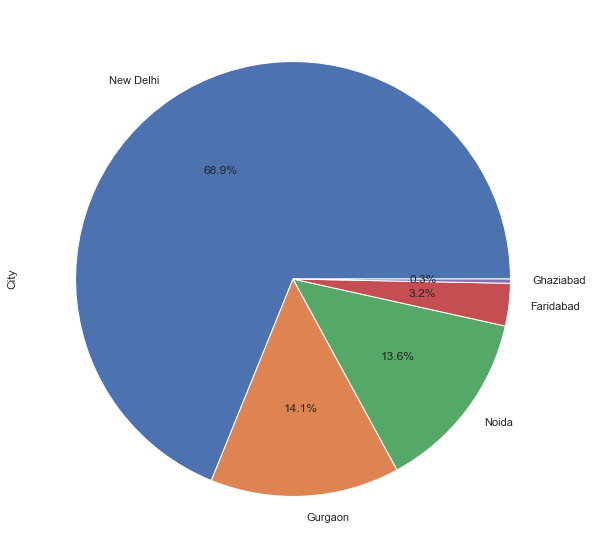

In [66]:
plt.figure(figsize=(10,10))
indiaRes['City'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')

## 11)Top cuisines in Indian restaurants.( Draw pie graph for this)

In [67]:
booking_avail=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5) &(indiaRes['Has Table booking']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Table booking']].sort_values(ascending=False,by='Votes')


<AxesSubplot:ylabel='Cuisines'>

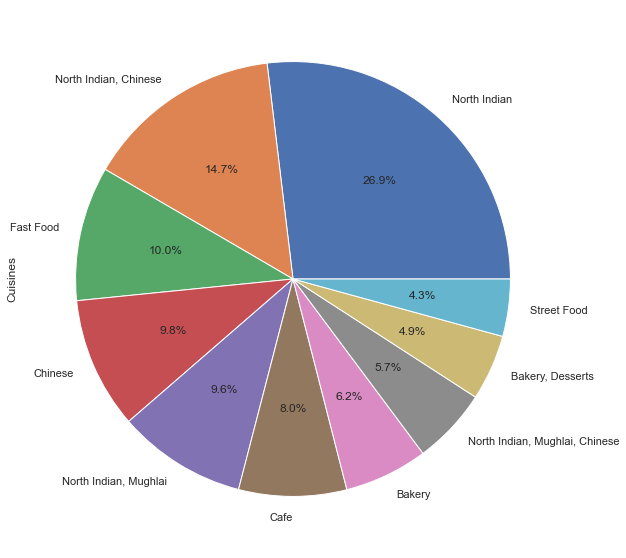

In [68]:
plt.figure(figsize=(10,10))
indiaRes['Cuisines'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

# The End!